<a href="https://colab.research.google.com/github/YugyeongJo/study_data_analytics/blob/main/docs/quests/EDAs/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [8]:
import pandas as pd
import seaborn as sns
df_LCOCT = pd.read_csv('/content/LetalCarOfContractType.csv')
df_LCOCT.info()
df_LCOCT.dropna(inplace=True)
df_LCOCT[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


## 기술 데이터 분석(DDA)

- 제안 7: 지불 방식에 따른 고객 행동 분석
  - 문제 정의: 다양한 지불 방식(예: CMS, 카드 이체 등)을 사용하는 고객들의 행동 패턴을 분석합니다.
  - 배경: 지불 방식에 따른 고객 행동을 이해함으로써, 효율적인 결제 시스템을 설계하고 고객 서비스를 개선할 수 있습니다.

In [9]:
# 지불 방식 분포 확인
df_LCOCT['payment_type'].value_counts()
# 카드이체 결제건보다 CMS 결제건이 1.85배 더 높음.
# 인사이트 : 자동결제 방식으로 결제된 고객의 수가 더 높다는 점에서 충성고객으로의 전환 가능성이 높을 것으로 보임.

CMS     26274
카드이체    14206
Name: payment_type, dtype: int64

In [10]:
# 결제은행 분포 확인
df_LCOCT['bank'].value_counts()[:10]
# 최다 건수 결제 은행의 순위는 롯데카드>국민은행>농협은행>신한은행>우리은행>신한카드>기업은행>국민카드>하나은행>BC카드
# 인사이트 : 롯데카드와 국민은행에 결제건이 몰려있는 것으로 보아 해당 카드사 관련 혜택 프로모션 진행 빈도수를 체크해볼 필요가 있음.

롯데카드    8755
국민은행    8032
농협은행    5280
신한은행    2767
우리은행    2671
신한카드    1389
기업은행    1270
국민카드    1112
하나은행    1088
BC카드    1062
Name: bank, dtype: int64

## EDA

<Axes: xlabel='payment_type', ylabel='amount'>

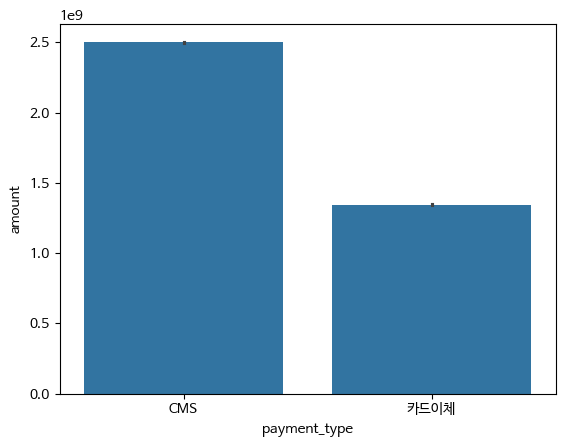

In [20]:
# # CMS 결제건의 amount 총합
# df_LCOCT_CMS = df_LCOCT.query('payment_type == "CMS"')
# CMS_sum_amount = df_LCOCT_CMS['amount'].sum()

# # 카드이체 결제건의 amount 총합
# df_LCOCT_card = df_LCOCT.query('payment_type == "카드이체"')
# card_sum_amount = df_LCOCT_card['amount'].sum()

# CMS_sum_amount, card_sum_amount

sns.barplot(data=df_LCOCT, x='payment_type', y='amount', estimator=sum)

# 인사이트 : DDA에서 확인한 단순한 결제건별 비중 차이를 각 결제건별과 amount를 비교하여 매출규모로써도 CMS결제가 카드이체 결제보다 높다는 것을 확인.

<Axes: ylabel='bank'>

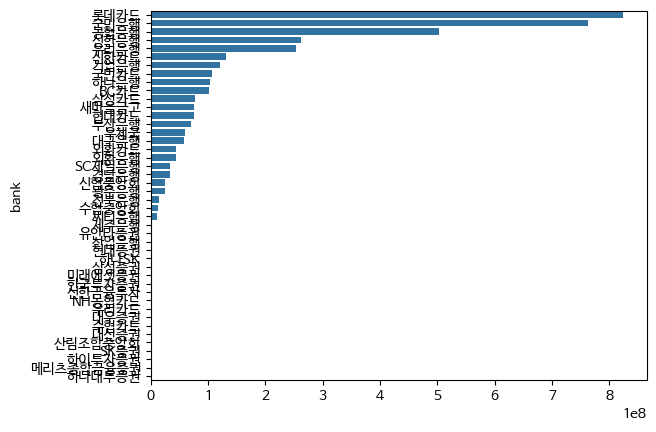

In [28]:
df_bank_amount_sorted = df_LCOCT.groupby('bank')['amount'].sum().sort_values(ascending=False)
sns.barplot(x=df_bank_amount_sorted.values, y=df_bank_amount_sorted.index)

# 인사이트 : 결제 건수로 확인한 각 은행별 사용 빈도 횟수 순위가 amount를 비교하여 매출규모로써도 동일한 양상을 보이고 있는 것을 확인.

보고용 insight 작성

- 지불 방식에 따른 인사이트
  + 분석 결과 : CMS 결제건이 카드이체 결제건보다 약 1.85배 높음.
  + 전략 제안 : 자동결제 방식인 CMS 결제건의 비중을 더 높여 충성고객들의 팬덤형성에 노력을 들일 필요가 있을 것으로 보임. 보다 편리한 CMS 결제 방식으로의 업데이트를 고민해볼 필요가 있을 것으로 보임.
- 결제 은행에 따른 인사이트
  + 분석 결과 : 결제 빈도수와 결제 금액 2가지 요소를 고려한 최다 결제 은행 순위는 다음과 같음.
  롯데카드>국민은행>농협은행>신한은행>우리은행>신한카드>기업은행>국민카드>하나은행>BC카드>기타
  + 전략 제안 : 현재 가장 높은 순위를 차지하고 있는 롯데카드, 국민은행, 농협은행의 카드관련 혜택 프로모션 진행 여부 및 진행 빈도수 데이터를 재확인할 필요가 있음. 이외 결제율이 하위권인 은행의 경우 프로모션 효율 검증 및 진행 가능 여부를 파악해 추진해보면 좋을 듯.